In [2]:
library(tidyverse)

Warning message:
"package 'tidyverse' was built under R version 3.6.1"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.0     v purrr   0.3.2
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'tibble' was built under R version 3.6.1"Warning message:
"package 'tidyr' was built under R version 3.6.1"Warning message:
"package 'readr' was built under R version 3.6.1"Warning message:
"package 'purrr' was built under R version 3.6.1"Warning message:
"package 'dplyr' was built under R version 3.6.1"Warning message:
"package 'stringr' was built under R version 3.6.1"Warning message:
"package 'forcats' was built under R version 3.6.1"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [20]:
# Read in information from CSV files
income_index <- read_csv("Income_composition of resources.csv")
unemployment <- read_csv("Unemployment, total (% of labour force).csv")
glimpse(income_index)

Warning message:
"Missing column names filled in: 'X4' [4], 'X6' [6], 'X8' [8], 'X10' [10], 'X12' [12], 'X14' [14], 'X16' [16], 'X18' [18], 'X20' [20], 'X22' [22], 'X24' [24], 'X26' [26], 'X28' [28], 'X30' [30], 'X32' [32], 'X34' [34], 'X36' [36], 'X38' [38], 'X40' [40], 'X42' [42], 'X44' [44], 'X46' [46], 'X48' [48], 'X50' [50], 'X52' [52], 'X54' [54], 'X56' [56], 'X58' [58]"Parsed with column specification:
cols(
  .default = col_character()
)
See spec(...) for full column specifications.
Warning message:
"Missing column names filled in: 'X4' [4], 'X6' [6], 'X8' [8], 'X10' [10], 'X12' [12], 'X14' [14], 'X16' [16], 'X18' [18], 'X20' [20], 'X22' [22], 'X24' [24], 'X26' [26]"Parsed with column specification:
cols(
  .default = col_character()
)
See spec(...) for full column specifications.


Observations: 197
Variables: 58
$ `HDI Rank (2017)` <chr> "168", "68", "85", "35", "147", "70", "47", "83",...
$ Country           <chr> "Afghanistan", "Albania", "Algeria", "Andorra", "...
$ `1990`            <chr> "..", "0.575", "0.694", "0.904", "0.456", "0.755"...
$ X4                <chr> "..", "..", "..", "..", "..", "..", "..", "..", "...
$ `1991`            <chr> "..", "0.523", "0.686", "0.902", "0.453", "0.762"...
$ X6                <chr> "..", "..", "..", "..", "..", "..", "..", "..", "...
$ `1992`            <chr> "..", "0.51", "0.686", "0.897", "0.45", "0.762", ...
$ X8                <chr> "..", "..", "..", "..", "..", "..", "..", "..", "...
$ `1993`            <chr> "..", "0.531", "0.681", "0.891", "0.403", "0.769"...
$ X10               <chr> "..", "..", "..", "..", "..", "..", "..", "..", "...
$ `1994`            <chr> "..", "0.547", "0.676", "0.89", "0.363", "0.775",...
$ X12               <chr> "..", "..", "..", "..", "..", "..", "..", "..", "...
$ `1995`            

In [21]:
# Filter out empty columns, and remove 1990 column, sort by HDI rank 
income_index2 <- income_index %>%
    select(-starts_with("X")) %>% 
    select(-('1990')) %>%
    transform(HDI = as.numeric(`HDI Rank (2017)`),check.names=FALSE) %>%
    arrange(HDI) %>%
    na.omit()

highest <- c(1:10)
high <- c(53:63)
low <- c(116:126)
lowest <-c(179:189)

income_index_highest <- income_index2 %>%
    subset(HDI %in% highest) %>%
    select(-(`HDI Rank (2017)`)) %>% # Remove HDI column
    select(-(HDI)) %>% 
    gather(key = Year, value = II, -Country) %>%
    transform(Year = as.numeric(Year), II = as.numeric(II), check.names=FALSE)

income_index_high <- income_index2 %>%
    subset(HDI %in% high) %>%
    select(-(`HDI Rank (2017)`)) %>% # Remove HDI column
    select(-(HDI)) %>% 
    gather(key = Year, value = II, -Country) %>%
    transform(Year = as.numeric(Year), II = as.numeric(II), check.names=FALSE)

income_index_low <- income_index2 %>%
    subset(HDI %in% low) %>%
    select(-(`HDI Rank (2017)`)) %>% # Remove HDI column
    select(-(HDI)) %>% 
    gather(key = Year, value = II, -Country) %>%
    transform(Year = as.numeric(Year), II = as.numeric(II), check.names=FALSE)

income_index_lowest <- income_index2 %>%
    subset(HDI %in% lowest) %>%
    select(-(`HDI Rank (2017)`)) %>% # Remove HDI column
    select(-(HDI)) %>% 
    gather(key = Year, value = II, -Country) %>%
    transform(Year = as.numeric(Year), II = as.numeric(II), check.names=FALSE)



Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
"NAs introduced by coercion"Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
"NAs introduced by coercion"Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
"NAs introduced by coercion"

Warning message:
"Removed 17 rows containing missing values (geom_path)."

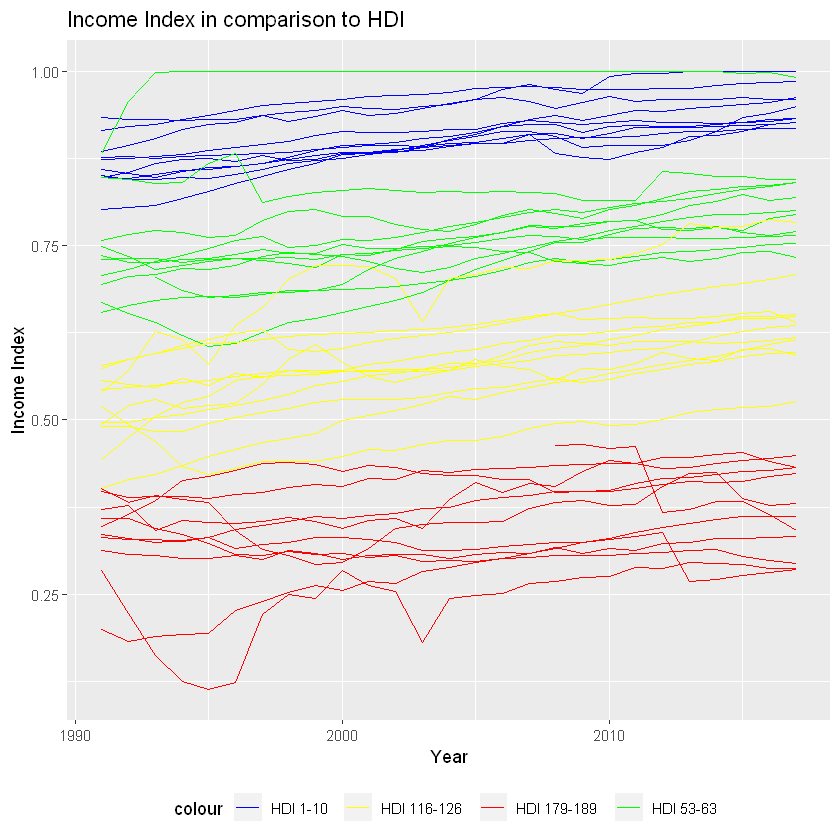

In [28]:
ggplot() + 
    geom_line(data = income_index_highest, aes(x = Year, y = II, group = Country, color = 'HDI 1-10'))  +
    geom_line(data = income_index_high, aes(x = Year, y = II, group = Country, color = 'HDI 53-63')) +
    geom_line(data = income_index_low, aes(x = Year, y = II, group = Country, color = 'HDI 116-126')) +
    geom_line(data = income_index_lowest, aes(x = Year, y = II, group = Country, color = 'HDI 179-189')) +
    scale_color_manual(values = c('HDI 1-10' = 'blue', 'HDI 53-63' = 'green', 'HDI 116-126' = 'yellow', 'HDI 179-189' = 'red')) +
    ggtitle('Income Index in comparison to HDI') + xlab('Year') + ylab('Income Index') + theme(legend.position = ("bottom"))

In [25]:
# Filter out empty columns, sort by HDI rank 
unemployment2 <- unemployment %>%
    select(-starts_with("X")) %>% 
    transform(HDI = as.numeric(`HDI Rank (2017)`), check.names=FALSE) %>%
    arrange(HDI) %>%
    na.omit()

unemployment_highest <- unemployment2 %>%
    subset(HDI %in% highest) %>%
    select(-(`HDI Rank (2017)`)) %>% # Remove HDI column
    select(-(HDI)) %>% 
    gather(key = Year, value = Unemployment, -Country) %>%
    transform(Year = as.numeric(Year), Unemployment = as.numeric(Unemployment))

unemployment_high <- unemployment2 %>%
    subset(HDI %in% high) %>%
    select(-(`HDI Rank (2017)`)) %>% # Remove HDI column
    select(-(HDI)) %>% 
    gather(key = Year, value = Unemployment, -Country) %>%
    transform(Year = as.numeric(Year), Unemployment = as.numeric(Unemployment))

unemployment_low <- unemployment2 %>%
    subset(HDI %in% low) %>%
    select(-(`HDI Rank (2017)`)) %>% # Remove HDI column
    select(-(HDI)) %>% 
    gather(key = Year, value = Unemployment, -Country) %>%
    transform(Year = as.numeric(Year), Unemployment = as.numeric(Unemployment))

unemployment_lowest <- unemployment2 %>%
    subset(HDI %in% lowest) %>%
    select(-(`HDI Rank (2017)`)) %>% # Remove HDI column
    select(-(HDI)) %>% 
    gather(key = Year, value = Unemployment, -Country) %>%
    transform(Year = as.numeric(Year), Unemployment = as.numeric(Unemployment))


Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
"NAs introduced by coercion"Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
"NAs introduced by coercion"

Warning message:
"Removed 24 rows containing missing values (geom_path)."

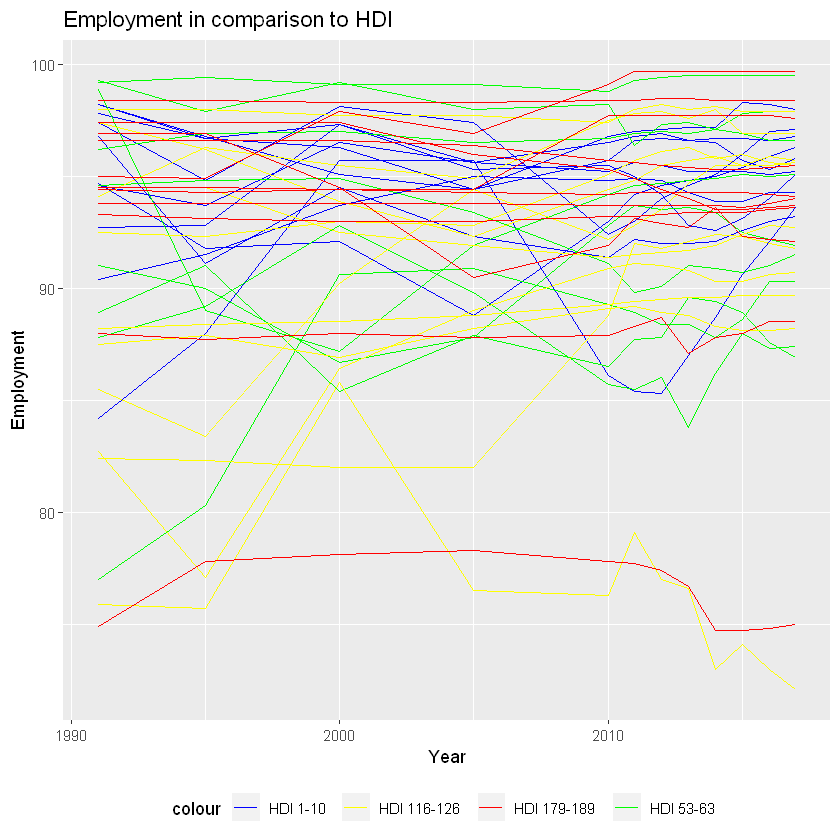

In [33]:
ggplot() + 
    geom_line(data = unemployment_highest, aes(x = Year, y = 100-Unemployment, group = Country, color = 'HDI 1-10'))  +
    geom_line(data = unemployment_high, aes(x = Year, y = 100-Unemployment, group = Country, color = 'HDI 53-63')) +
    geom_line(data = unemployment_low, aes(x = Year, y = 100-Unemployment, group = Country, color = 'HDI 116-126')) +
    geom_line(data = unemployment_lowest, aes(x = Year, y = 100-Unemployment, group = Country, color = 'HDI 179-189')) +
    scale_color_manual(values = c('HDI 1-10' = 'blue', 'HDI 53-63' = 'green', 'HDI 116-126' = 'yellow', 'HDI 179-189' = 'red')) +
    ggtitle('Employment in comparison to HDI') + xlab('Year') + ylab('Employment') + theme(legend.position = ("bottom"))

In [35]:
income_inequality <- read_csv("Income Inequality.csv")

income_inequality


Parsed with column specification:
cols(
  .default = col_character()
)
See spec(...) for full column specifications.


HDI Rank (2017),Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
168,Afghanistan,..,..,..,..,..,..,..,..,...,0.437,0.453,0.463,0.471,0.482,0.487,0.491,0.493,0.494,0.498
68,Albania,0.645,0.626,0.61,0.613,0.619,0.632,0.641,0.641,...,0.724,0.729,0.741,0.752,0.767,0.771,0.773,0.776,0.782,0.785
85,Algeria,0.577,0.581,0.587,0.591,0.595,0.6,0.608,0.617,...,0.709,0.719,0.729,0.736,0.74,0.745,0.747,0.749,0.753,0.754
35,Andorra,..,..,..,..,..,..,..,..,...,0.831,0.83,0.828,0.827,0.849,0.85,0.853,0.854,0.856,0.858
147,Angola,..,..,..,..,..,..,..,..,...,0.502,0.522,0.52,0.535,0.543,0.554,0.564,0.572,0.577,0.581
70,Antigua and Barbuda,..,..,..,..,..,..,..,..,...,0.777,0.77,0.766,0.762,0.765,0.768,0.77,0.775,0.778,0.78
47,Argentina,0.704,0.713,0.72,0.725,0.728,0.731,0.738,0.746,...,0.795,0.799,0.813,0.819,0.818,0.82,0.82,0.822,0.822,0.825
83,Armenia,0.631,0.628,0.58,0.588,0.599,0.605,0.612,0.623,...,0.727,0.724,0.728,0.731,0.737,0.742,0.745,0.748,0.749,0.755
3,Australia,0.866,0.867,0.868,0.872,0.875,0.883,0.886,0.889,...,0.92,0.921,0.923,0.925,0.929,0.931,0.933,0.936,0.938,0.939
20,Austria,0.795,0.8,0.805,0.807,0.813,0.817,0.82,0.824,...,0.884,0.886,0.895,0.897,0.899,0.897,0.901,0.903,0.906,0.908


In [37]:
# Filter out empty columns, and remove 1990 column, sort by HDI rank 
income_inequality2 <- income_inequality %>%
    select(-('1990')) %>%
    transform(HDI = as.numeric(`HDI Rank (2017)`),check.names=FALSE) %>%
    arrange(HDI) %>%
    na.omit()

income_inequality_highest <- income_inequality2 %>%
    subset(HDI %in% highest) %>%
    select(-(`HDI Rank (2017)`)) %>% # Remove HDI column
    select(-(HDI)) %>% 
    gather(key = Year, value = II, -Country) %>%
    transform(Year = as.numeric(Year), II = as.numeric(II), check.names=FALSE)

income_inequality_high <- income_inequality2 %>%
    subset(HDI %in% high) %>%
    select(-(`HDI Rank (2017)`)) %>% # Remove HDI column
    select(-(HDI)) %>% 
    gather(key = Year, value = II, -Country) %>%
    transform(Year = as.numeric(Year), II = as.numeric(II), check.names=FALSE)

income_inequality_low <- income_inequality2 %>%
    subset(HDI %in% low) %>%
    select(-(`HDI Rank (2017)`)) %>% # Remove HDI column
    select(-(HDI)) %>% 
    gather(key = Year, value = II, -Country) %>%
    transform(Year = as.numeric(Year), II = as.numeric(II), check.names=FALSE)

income_inequality_lowest <- income_inequality2 %>%
    subset(HDI %in% lowest) %>%
    select(-(`HDI Rank (2017)`)) %>% # Remove HDI column
    select(-(HDI)) %>% 
    gather(key = Year, value = II, -Country) %>%
    transform(Year = as.numeric(Year), II = as.numeric(II), check.names=FALSE)


Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
"NAs introduced by coercion"Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
"NAs introduced by coercion"Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
"NAs introduced by coercion"Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
"NAs introduced by coercion"

Warning message:
"Removed 31 rows containing missing values (geom_path)."Warning message:
"Removed 22 rows containing missing values (geom_path)."Warning message:
"Removed 59 rows containing missing values (geom_path)."

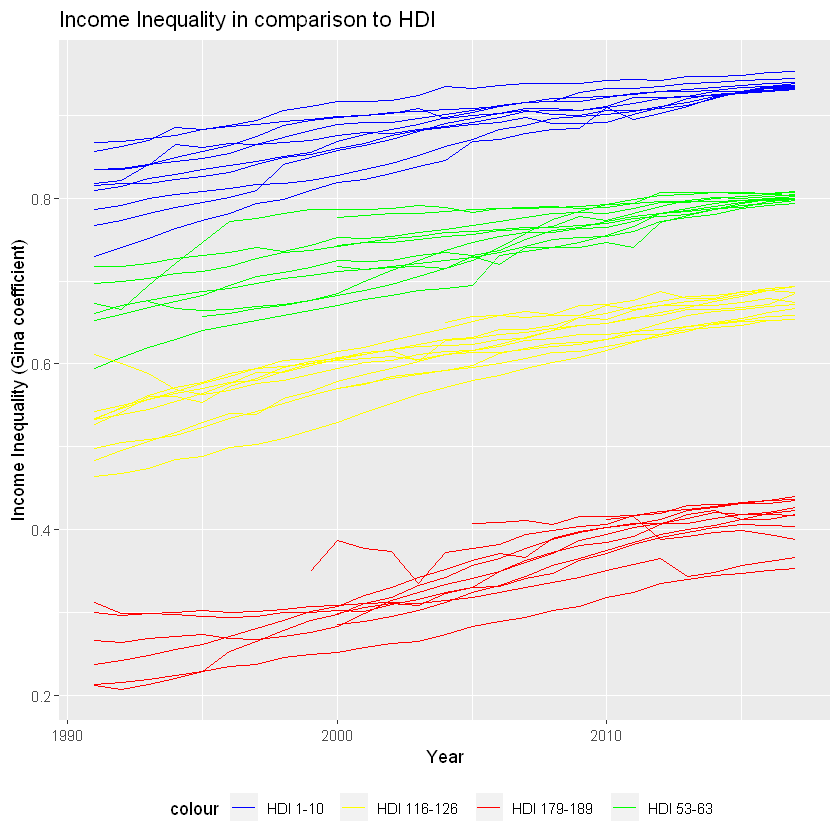

In [53]:
ggplot() + 
    geom_line(data = income_inequality_highest, aes(x = Year, y = II, group = Country, color = 'HDI 1-10'))  +
    geom_line(data = income_inequality_high, aes(x = Year, y = II, group = Country, color = 'HDI 53-63')) +
    geom_line(data = income_inequality_low, aes(x = Year, y = II, group = Country, color = 'HDI 116-126')) +
    geom_line(data = income_inequality_lowest, aes(x = Year, y = II, group = Country, color = 'HDI 179-189')) +
    scale_color_manual(values = c('HDI 1-10' = 'blue', 'HDI 53-63' = 'green', 'HDI 116-126' = 'yellow', 'HDI 179-189' = 'red')) +
    ggtitle('Income Inequality in comparison to HDI') + xlab('Year') + ylab('Income Inequality (Gina coefficient)') + theme(legend.position = ("bottom"))

In [44]:
male_employment <- read_csv("Labour force participation rate (% ages 15 and older), male.csv")
male_employment

Warning message:
"Missing column names filled in: 'X4' [4], 'X6' [6], 'X8' [8], 'X10' [10], 'X12' [12], 'X14' [14], 'X16' [16], 'X18' [18], 'X20' [20], 'X22' [22], 'X24' [24], 'X26' [26]"Parsed with column specification:
cols(
  .default = col_character()
)
See spec(...) for full column specifications.


HDI Rank (2017),Country,1990,X4,1995,X6,2000,X8,2005,X10,...,2013,X18,2014,X20,2015,X22,2016,X24,2017,X26
168,Afghanistan,86.7,..,86.4,..,86.5,..,87.1,..,...,86.6,..,86.6,..,86.7,..,86.7,..,86.7,a
68,Albania,74.4,..,73.7,..,73.6,..,67.9,..,...,62.7,..,63.9,..,65.2,..,65.1,..,64.9,a
85,Algeria,76.5,..,77.7,..,74.7,..,71.8,..,...,70.2,..,67.4,..,67.4,..,67.4,..,67.3,a
147,Angola,81.6,..,81.3,..,80.8,..,80.6,..,...,80.5,..,80.4,..,80.3,..,80.2,..,80.1,a
47,Argentina,75.5,..,75,..,75.4,..,75.6,..,...,73.9,..,73.5,..,73.4,..,73.4,..,73.2,a
83,Armenia,70.5,..,69.2,..,66.6,..,65.9,..,...,70.6,..,70.8,..,70.2,..,70.3,..,70.6,a
3,Australia,75.8,..,74,..,72.3,..,72.2,..,...,71.4,..,71,..,71.2,..,70.7,..,70.5,a
20,Austria,70,..,70.3,..,68.9,..,66.1,..,...,66.6,..,66.1,..,66,..,66.2,..,66,a
80,Azerbaijan,70.2,..,71.9,..,70.3,..,66,..,...,68,..,68.4,..,68.7,..,69.7,..,69.5,a
54,Bahamas,79.4,..,82.4,..,81.5,..,81.6,..,...,81.8,..,81.9,..,82,..,82,..,82,a


In [64]:
# Filter out empty columns, and remove 1990 column, sort by HDI rank 
male_employment2 <- male_employment %>%
    select(-starts_with("X")) %>% 
    select(-('1990')) %>%
    transform(HDI = as.numeric(`HDI Rank (2017)`),check.names=FALSE) %>%
    arrange(HDI) %>%
    na.omit()

male_employment_highest <- male_employment2 %>%
    subset(HDI %in% highest) %>%
    select(-(`HDI Rank (2017)`)) %>% # Remove HDI column
    select(-(HDI)) %>% 
    gather(key = Year, value = ME, -Country) %>%
    transform(Year = as.numeric(Year), ME = as.numeric(ME), check.names=FALSE)

male_employment_high <- male_employment2 %>%
    subset(HDI %in% high) %>%
    select(-(`HDI Rank (2017)`)) %>% # Remove HDI column
    select(-(HDI)) %>% 
    gather(key = Year, value = ME, -Country) %>%
    transform(Year = as.numeric(Year), ME = as.numeric(ME), check.names=FALSE)

male_employment_low <- male_employment2 %>%
    subset(HDI %in% low) %>%
    select(-(`HDI Rank (2017)`)) %>% # Remove HDI column
    select(-(HDI)) %>% 
    gather(key = Year, value = ME, -Country) %>%
    transform(Year = as.numeric(Year), ME = as.numeric(ME), check.names=FALSE)

male_employment_lowest <- male_employment2 %>%
    subset(HDI %in% lowest) %>%
    select(-(`HDI Rank (2017)`)) %>% # Remove HDI column
    select(-(HDI)) %>% 
    gather(key = Year, value = ME, -Country) %>%
    transform(Year = as.numeric(Year), ME = as.numeric(ME), check.names=FALSE)


Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
"NAs introduced by coercion"Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
"NAs introduced by coercion"

Warning message:
"Removed 22 rows containing missing values (geom_path)."

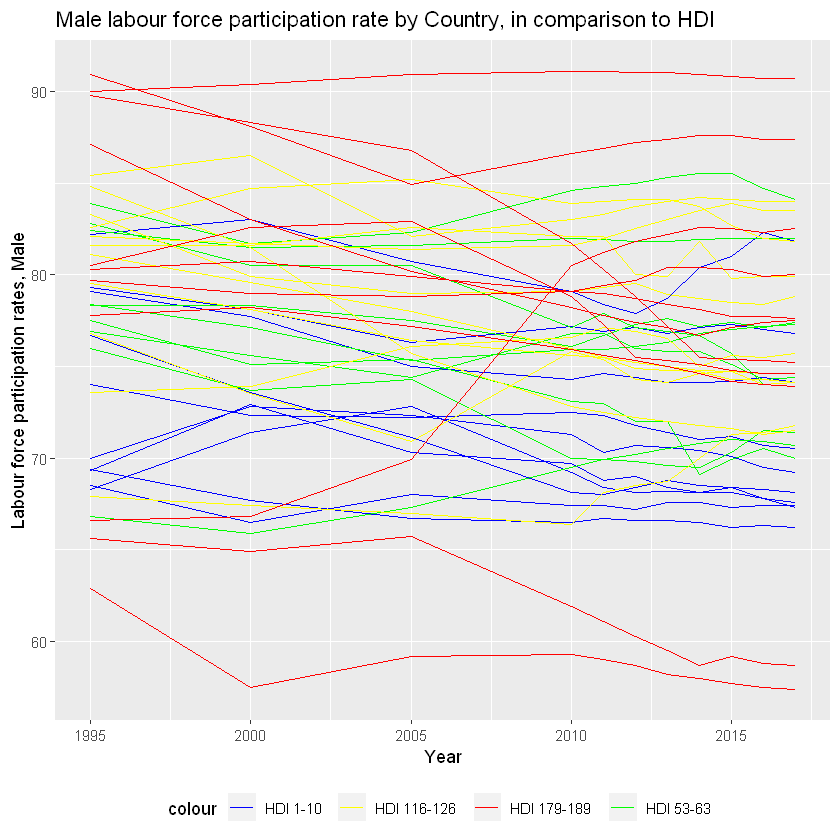

In [67]:
ggplot() + 
    geom_line(data = male_employment_highest, aes(x = Year, y = ME, group = Country, color = 'HDI 1-10'))  +
    geom_line(data = male_employment_high, aes(x = Year, y = ME, group = Country, color = 'HDI 53-63')) +
    geom_line(data = male_employment_low, aes(x = Year, y = ME, group = Country, color = 'HDI 116-126')) +
    geom_line(data = male_employment_lowest, aes(x = Year, y = ME, group = Country, color = 'HDI 179-189')) +
    scale_color_manual(values = c('HDI 1-10' = 'blue', 'HDI 53-63' = 'green', 'HDI 116-126' = 'yellow', 'HDI 179-189' = 'red')) +
    ggtitle('Male labour force participation rate by Country, in comparison to HDI') + xlab('Year') + ylab('Labour force participation rates, Male') + theme(legend.position = ("bottom"))

In [68]:
female_employment <- read_csv("Labour force participation rate (% ages 15 and older), female.csv")
female_employment

Warning message:
"Missing column names filled in: 'X4' [4], 'X6' [6], 'X8' [8], 'X10' [10], 'X12' [12], 'X14' [14], 'X16' [16], 'X18' [18], 'X20' [20], 'X22' [22], 'X24' [24], 'X26' [26]"Parsed with column specification:
cols(
  .default = col_character()
)
See spec(...) for full column specifications.


HDI Rank (2017),Country,1990,X4,1995,X6,2000,X8,2005,X10,...,2013,X18,2014,X20,2015,X22,2016,X24,2017,X26
168,Afghanistan,14.8,..,15,..,14.5,..,16.1,..,...,16.9,..,17.8,..,18.7,..,19.4,..,19.5,a
68,Albania,53.6,..,53.5,..,51.7,..,48.1,..,...,44.7,..,44.8,..,47.7,..,47.4,..,47.2,a
85,Algeria,11.5,..,11.8,..,11.9,..,12.8,..,...,16.9,..,15.3,..,15.2,..,15.1,..,15.2,a
147,Angola,75.2,..,74.7,..,74.7,..,74.9,..,...,75.4,..,75.4,..,75.4,..,75.3,..,75.3,a
47,Argentina,44.3,..,46.9,..,48.9,..,49.4,..,...,47.8,..,47.2,..,47.5,..,47.4,..,47.3,a
83,Armenia,49,..,48.8,..,48,..,47.5,..,...,52.7,..,52,..,51.2,..,51.2,..,51.4,a
3,Australia,52.3,..,53.7,..,54.6,..,57.1,..,...,58.7,..,58.7,..,59.1,..,59.2,..,59.2,a
20,Austria,43.4,..,48.8,..,48.9,..,50.7,..,...,54.6,..,54.6,..,54.5,..,55,..,55,a
80,Azerbaijan,52.1,..,56.2,..,57,..,61.1,..,...,61.3,..,61.9,..,62.5,..,63,..,62.9,a
54,Bahamas,64.8,..,68.3,..,69.2,..,69.9,..,...,70.1,..,70,..,69.9,..,69.8,..,70,a


In [69]:
# Filter out empty columns, and remove 1990 column, sort by HDI rank 
female_employment2 <- female_employment %>%
    select(-starts_with("X")) %>% 
    select(-('1990')) %>%
    transform(HDI = as.numeric(`HDI Rank (2017)`),check.names=FALSE) %>%
    arrange(HDI) %>%
    na.omit()

female_employment_highest <- female_employment2 %>%
    subset(HDI %in% highest) %>%
    select(-(`HDI Rank (2017)`)) %>% # Remove HDI column
    select(-(HDI)) %>% 
    gather(key = Year, value = FE, -Country) %>%
    transform(Year = as.numeric(Year), FE = as.numeric(FE), check.names=FALSE)

female_employment_high <- female_employment2 %>%
    subset(HDI %in% high) %>%
    select(-(`HDI Rank (2017)`)) %>% # Remove HDI column
    select(-(HDI)) %>% 
    gather(key = Year, value = FE, -Country) %>%
    transform(Year = as.numeric(Year), FE = as.numeric(FE), check.names=FALSE)

female_employment_low <- female_employment2 %>%
    subset(HDI %in% low) %>%
    select(-(`HDI Rank (2017)`)) %>% # Remove HDI column
    select(-(HDI)) %>% 
    gather(key = Year, value = FE, -Country) %>%
    transform(Year = as.numeric(Year), FE = as.numeric(FE), check.names=FALSE)

female_employment_lowest <- female_employment2 %>%
    subset(HDI %in% lowest) %>%
    select(-(`HDI Rank (2017)`)) %>% # Remove HDI column
    select(-(HDI)) %>% 
    gather(key = Year, value = FE, -Country) %>%
    transform(Year = as.numeric(Year), FE = as.numeric(FE), check.names=FALSE)

Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
"NAs introduced by coercion"Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
"NAs introduced by coercion"

Warning message:
"Removed 22 rows containing missing values (geom_path)."

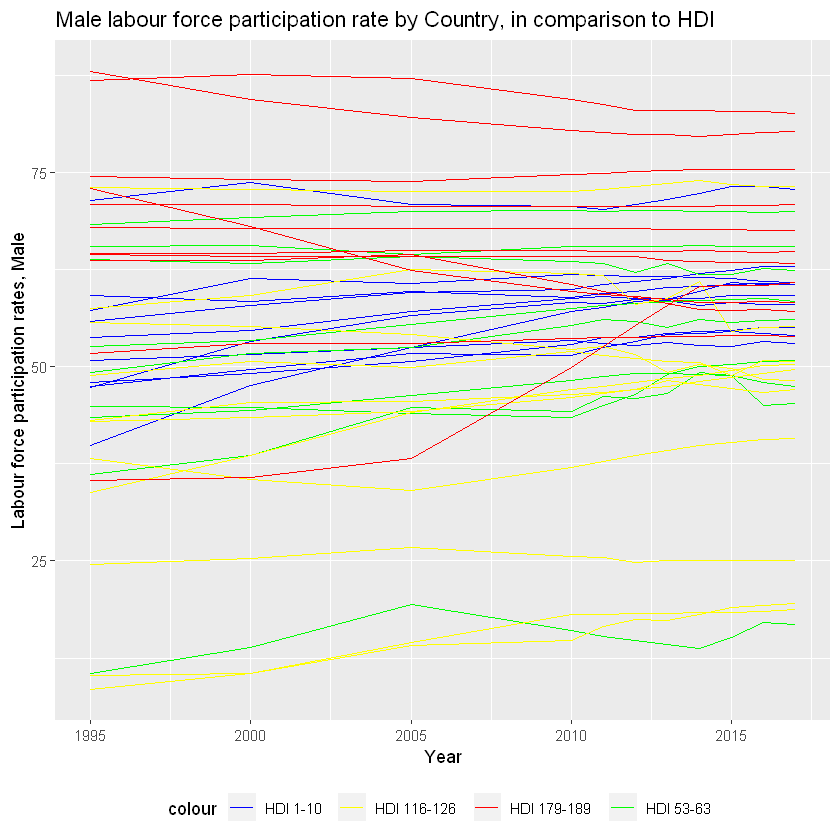

In [70]:
ggplot() + 
    geom_line(data = female_employment_highest, aes(x = Year, y = FE, group = Country, color = 'HDI 1-10'))  +
    geom_line(data = female_employment_high, aes(x = Year, y = FE, group = Country, color = 'HDI 53-63')) +
    geom_line(data = female_employment_low, aes(x = Year, y = FE, group = Country, color = 'HDI 116-126')) +
    geom_line(data = female_employment_lowest, aes(x = Year, y = FE, group = Country, color = 'HDI 179-189')) +
    scale_color_manual(values = c('HDI 1-10' = 'blue', 'HDI 53-63' = 'green', 'HDI 116-126' = 'yellow', 'HDI 179-189' = 'red')) +
    ggtitle('Male labour force participation rate by Country, in comparison to HDI') + xlab('Year') + ylab('Labour force participation rates, Male') + theme(legend.position = ("bottom"))